In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
src = cv2.imread('../segmentation_rsc/bridge.jpg')
srcrgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
mask = np.zeros((src.shape[0]+2, src.shape[1]+2), np.uint8)# height, width 각각 +2만큼 패링한 것

seed = (180, 80)
lodiff, updiff = (5, 5, 5), (5, 5, 5)
cv2.floodFill(src, mask, seedPoint = seed, newVal = 255, loDiff = lodiff, upDiff = updiff)
cv2.circle(srcrgb, seed, 3, (255, 0, 0), cv2.FILLED, cv2.LINE_AA)

array([[[  0,  88, 144],
        [  0,  89, 145],
        [  0,  89, 145],
        ...,
        [  0,  98, 157],
        [  0,  98, 157],
        [  0,  98, 157]],

       [[  0,  89, 145],
        [  0,  89, 145],
        [  0,  89, 145],
        ...,
        [  0,  98, 157],
        [  0,  98, 157],
        [  0,  98, 157]],

       [[  0,  89, 145],
        [  0,  89, 145],
        [  0,  89, 145],
        ...,
        [  0,  99, 158],
        [  0,  99, 158],
        [  0,  99, 158]],

       ...,

       [[ 10,  10,   0],
        [ 10,  10,   0],
        [ 12,  12,   2],
        ...,
        [ 23,  25,  22],
        [ 27,  29,  26],
        [  9,  11,   8]],

       [[ 29,  26,  17],
        [ 32,  29,  20],
        [ 27,  24,  17],
        ...,
        [ 15,  17,  12],
        [ 19,  21,  16],
        [  9,  11,   6]],

       [[ 41,  38,  29],
        [ 49,  46,  37],
        [ 38,  35,  28],
        ...,
        [  5,   7,   2],
        [  8,  10,   5],
        [  9,  11,   6]]

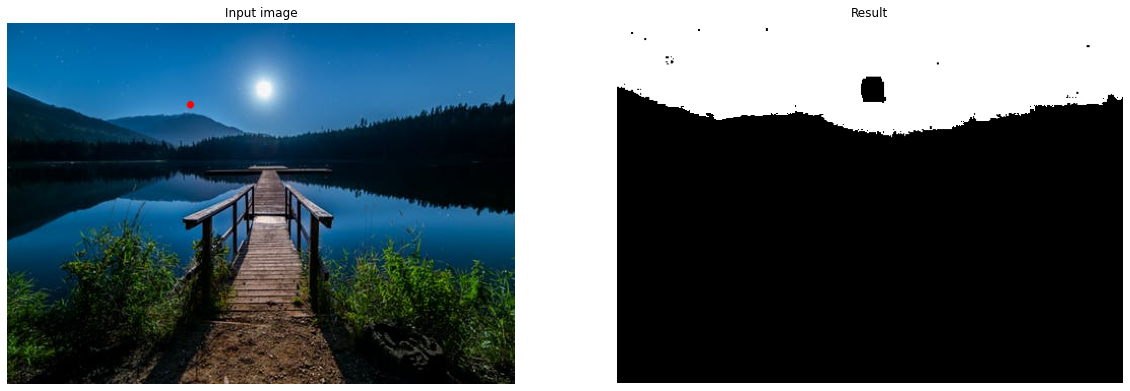

In [3]:
plt.figure(figsize = (20, 20))
image1 = plt.subplot(1, 2, 1)
image1.set_title('Input image')
plt.axis('off')
plt.imshow(srcrgb)

image2 = plt.subplot(1, 2, 2)
image2.set_title('Result')
plt.axis('off')
plt.imshow(mask, cmap = 'gray')

In [4]:
# 마우스로 seed 지정
src2 = cv2.imread('../segmentation_rsc/duck.png')
mask2 = np.zeros((src2.shape[0]+2, src2.shape[1]+2), np.uint8)

In [5]:
def onMouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        seed = (x, y)
        r = np.random.randint(256)
        g = np.random.randint(256)
        b = np.random.randint(256)
        newVal = (b, g, r)
        retval = cv2.floodFill(src2, mask2, seed, newVal = newVal, loDiff = lodiff, upDiff = updiff)
        cv2.imshow('src2', src2)

In [7]:
cv2.imshow('src2', src2)
cv2.setMouseCallback('src2', onMouse)
cv2.waitKey()
cv2.destroyAllWindows()